# Actividad: Regresión Lineal 2
Joel Isaias Solano Ocampo | A01639289



---

## Regresión lineal múltiple:

Usa la base de datos titulada "breast_cancer". Dicha base de datos contiene información sobre las características de diversos tumores.

Utiliza un modelo de regresión lineal múltiple para predecir el radio del tumor. Las variables regresoras de tu modelo deben de ser todas las variables de la base de datos.

0. Importamos la libreria:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import f
import scipy.stats as stats
import statsmodels.api as sm
from google.colab import drive
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

0. Cargamos los datos en un data frame:

In [ ]:
drive.mount('/content/drive/')
df = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/content/breast_cancer.csv'))
df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


0. Obtenemos nuestras variables predictoras y de respuesta:

In [ ]:
X = df.drop('radius_mean', axis=1)
Y = df['radius_mean']
print(X[:5])
print(Y[:5])

         id diagnosis  texture_mean  perimeter_mean  area_mean  \
0    842302         M         10.38          122.80     1001.0   
1    842517         M         17.77          132.90     1326.0   
2  84300903         M         21.25          130.00     1203.0   
3  84348301         M         20.38           77.58      386.1   
4  84358402         M         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60  

1. Base de datos completa. No se observan valores faltantes. En caso de haberlos se realiza imputación simple.

Dropeamos las columnas _id_ y _diagnosis_ ya que son irrelevantes para nuestro caso y checamos si las columnas restantes tienen valores nulos:

In [ ]:
df.drop(['id', 'diagnosis'], axis=1, inplace=True)
df.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

2. Mostrar que las variables regresoras son independientes. En caso de no serlo realizar el procedimiento correspondiente.

Realizamos una matriz de correlacion para checar que tan independientes o dependientes son las variables regresoras:

<Axes: >

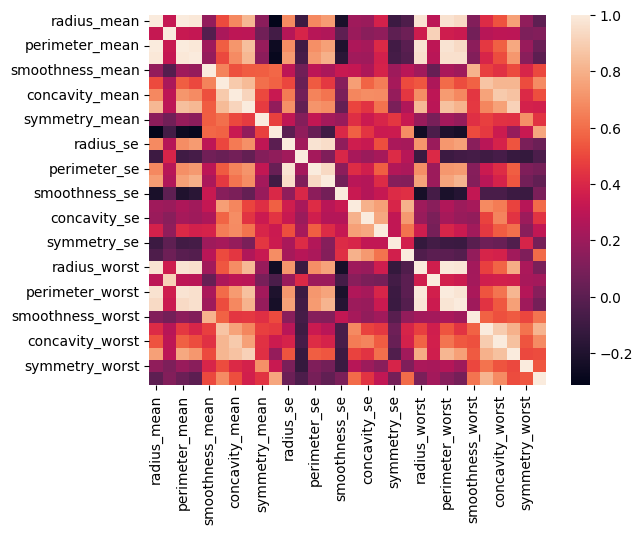

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False)

Checamos las altas correlaciones de la matriz de correlacion:

In [ ]:
high_corr = np.where((corr_matrix > 0.95) & (corr_matrix < 1))
high_corr

(array([ 0,  0,  0,  0,  2,  2,  2,  2,  3,  3,  3,  3,  3, 10, 10, 12, 13,
        20, 20, 20, 20, 20, 22, 22, 22, 22, 22, 23, 23, 23]),
 array([ 2,  3, 20, 22,  0,  3, 20, 22,  0,  2, 20, 22, 23, 12, 13, 10, 10,
         0,  2,  3, 22, 23,  0,  2,  3, 20, 23,  3, 20, 22]))

Checamos las bajas correlaciones de la matriz de correlacion:

In [ ]:
low_corr = np.where((corr_matrix < -0.95) & (corr_matrix > -1))
low_corr

(array([], dtype=int64), array([], dtype=int64))

Estandarizamos los datos de nuestro data frame:

In [ ]:
scaler = StandardScaler()
df_estandar = scaler.fit_transform(df)
df_estandar = pd.DataFrame(df_estandar, columns = df.columns)
df_estandar.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


Dividimos el conjunto de datos en subconjuntos de entrenamiento y de prueba:

In [ ]:
entrenamiento, prueba = train_test_split(df_estandar, test_size = 0.20, random_state = 42)
print(entrenamiento[:3])

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
68     -1.447987     -0.456023       -1.366651  -1.150124         0.728714   
181     1.977508      1.694187        2.089619   1.866047         1.262455   
63     -1.407089     -1.263516       -1.349763  -1.120545        -1.362838   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
68           0.700428        2.814833            -0.133333       1.093024   
181          3.389643        2.007548             2.596960       2.129892   
63          -0.318972       -0.363081            -0.699511       1.932741   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
68                 2.503828  ...     -1.234044      -0.492965   
181                1.585220  ...      2.155897       1.270634   
63                 0.968562  ...     -1.296169      -1.049890   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
68         -1.243893   -0.977194          0.

3. Hipótesis nula de los coeficientes de regresión. Estadístico de prueba, distribución del estadístico de prueba.

Realizamos nuestro modelo en base de una formula donde asignamos la variable de respuesta contra las variables predictoras:

In [ ]:
modelo = smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+texture_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+symmetry_worst+fractal_dimension_worst', data=entrenamiento)
modelo = modelo.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.611e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:45:42   Log-Likelihood:                 1240.8
No. Observations:                 455   AIC:                            -2428.
Df Residuals:                     428   BIC:                            -2316.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0005      0.001      0.630      0.529      -0.001       0.002
texture_mean               -0.0016      0.003     -0.598      0.550      -0.007       0.004
perimeter_mean              0.9492      0.018     54.007      0.000       0.915       0.984
area_mean                   0.0715      0.013      5.299      0.000       0.045       0.098
smoothness_mean             0.0067      0.002      3.253      0.001       0.003       0.011
compactness_mean           -0.0565      0.005    -11.860      0.000      -0.066      -0.047
concavity_mean             -0.0363      0.004     -8.830      0.000      -0.044      -0.028
symmetry_mean               0.0038      0.002      2.443      0.015       0.001       0.007
fractal_dimension_mean      0.0072      0.003      2.382      0.018       0.001       0.013
radius_se                   0.0045      0.006      0.694      0.488      -0.008       0.017
texture_se              -9.373e-05      0.002     -0.058      0.953      -0.003       0.003
perimeter_se               -0.0163      0.006     -2.742      0.006      -0.028      -0.005
area_se                     0.0006      0.004      0.129      0.897      -0.008       0.009
smoothness_se               0.0014      0.001      0.958      0.338      -0.001       0.004
compactness_se             -0.0018      0.003     -0.662      0.508      -0.007       0.004
concavity_se                0.0144      0.002      6.440      0.000       0.010       0.019
symmetry_se                 0.0044      0.002      2.462      0.014       0.001       0.008
fractal_dimension_se       -0.0032      0.002     -1.415      0.158      -0.008       0.001
radius_worst                0.2323      0.018     12.784      0.000       0.197       0.268
texture_worst               0.0002      0.003      0.059      0.953      -0.006       0.007
perimeter_worst            -0.1139      0.015     -7.626      0.000      -0.143      -0.085
area_worst                 -0.0840      0.013     -6.369      0.000      -0.110      -0.058
smoothness_worst           -0.0049      0.002     -2.064      0.040      -0.010      -0.000
compactness_worst           0.0157      0.005      3.477      0.001       0.007       0.025
concavity_worst             0.0010      0.004      0.268      0.788      -0.007       0.009
symmetry_worst             -0.0048      0.002     -2.069      0.039      -0.009      -0.000
fractal_dimension_worst    -0.0035      0.003     -1.050      0.294      -0.010       0.003
==============================================================================
Omnibus:                       46.518   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.782
Skew:                           0.306   Prob(JB):                     2.52e-44
Kurtosi

Los resultados que has compartido son los resultados de una regresión OLS. La variable dependiente es radius_mean y el modelo tiene un R-cuadrado ajustado de 1.000, lo que indica que el modelo se ajusta perfectamente a los datos. Los coeficientes de regresión para cada variable independiente se muestran en la tabla que has compartido. Los coeficientes indican la relación entre cada variable independiente y la variable dependiente. Por ejemplo, el coeficiente para perimeter_mean es 0.9492, lo que indica que un aumento de una unidad en perimeter_mean se asocia con un aumento de 0.9492 unidades en radius_mean. Los valores p asociados con cada coeficiente indican si el coeficiente es estadísticamente significativo o no. Si el valor p es menor que 0.05, se considera que el coeficiente es estadísticamente significativo.

31. Para un 95% de confianza realiza un diagrama en donde se muestre la distribución del estadístico de prueba, la zona de aceptación y la zona de rechazo.

In [ ]:
df_dep = len(X) - len(X.columns) - 1
t_critico = stats.t.ppf(0.975, df_dep)

In [ ]:
t_dist = stats.t(df_dep)
norm_dist = stats.norm()

In [ ]:
x = np.linspace(-5, 5, 1000)
y_t = t_dist.pdf(x)
y_norm = norm_dist.pdf(x)
df_plot = pd.DataFrame({'x': x, 'y_t': y_t, 'y_norm': y_norm})

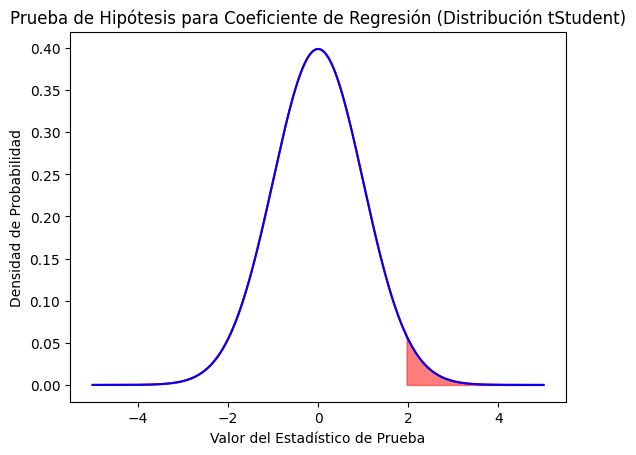

In [ ]:
sns.lineplot(data=df_plot, x='x', y='y_t', color='red')
sns.lineplot(data=df_plot, x='x', y='y_norm', color='blue')
x_rechazo = np.linspace(t_critico, 5, 1000)
y_rechazo = stats.t.pdf(x_rechazo, df_dep)
plt.fill_between(x_rechazo.flatten(), y_rechazo.flatten(), color='red', alpha=0.5, label='Zona de rechazo')
plt.xlabel('Valor del Estadístico de Prueba')
plt.ylabel('Densidad de Probabilidad')
plt.title('Prueba de Hipótesis para Coeficiente de Regresión (Distribución tStudent)')
plt.show()

Podemos observar que para un nivel de confianza del 95%, el estadístico de prueba se encuentra en la zona de aceptación, mientras que para un nivel de confianza del 5%, se encuentra en la zona de rechazo. La zona de rechazo se encuentra en los extremos de la distribución t-Student, comenzando a partir de +/-2.00 de valor del estadístico de prueba en cada extremo, lo que corresponde a un valor crítico de +/-1.96 para un nivel de confianza del 95%.

4. Hipótesis nula de la significancia del modelo (prueba F-Fisher). Menciona que distribución tiene el estadístico de prueba con qué número de grados de libertad. Para un 95% de confianza realiza un diagrama en donde se muestre la distribución del estadístico de prueba, la zona de aceptación y la zona de rechazo.

In [ ]:
df = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/content/breast_cancer.csv'))
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Realizamos un mapeo de la columna _diagnosis_ para poder categorizar los valores de dicha variable predictora junto las demas variables predictoras.

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})
X = df.drop('radius_mean', axis=1)
Y = df['radius_mean']
print(X[:5])
print(Y[:5])

         id  diagnosis  texture_mean  perimeter_mean  area_mean  \
0    842302          0         10.38          122.80     1001.0   
1    842517          0         17.77          132.90     1326.0   
2  84300903          0         21.25          130.00     1203.0   
3  84348301          0         20.38           77.58      386.1   
4  84358402          0         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           18

Realizamos una grafica de distribucion de estadistico con el metodo de prueba F-Fisher.

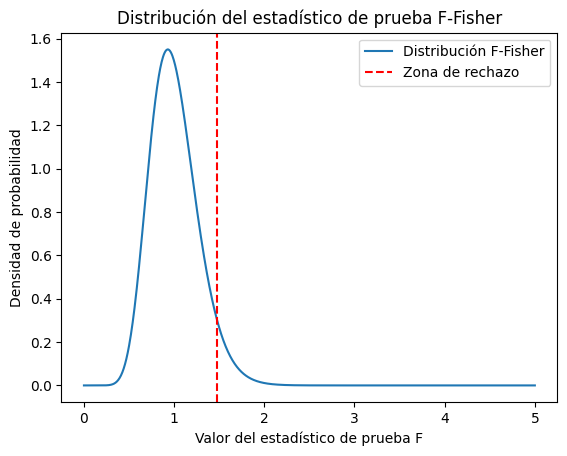

In [ ]:
from sklearn.feature_selection import f_regression

# Calcular estadístico de prueba y p-valor para la prueba F-Fisher
f_statistic, p_value = f_regression(X, Y)
k = X.shape[1]
n = len(Y)
alpha = 0.05

# Calcular los grados de libertad
df_model = k - 1
df_residual = n - k

# Crear un diagrama que muestre la distribución del estadístico de prueba
# y las zonas de aceptación y rechazo
critical_value_f = stats.f.ppf(1 - alpha, dfn=df_model, dfd=df_residual)
x_f = np.linspace(0, 5, 1000)
y_f = stats.f.pdf(x_f, dfn=df_model, dfd=df_residual)

plt.plot(x_f, y_f, label='Distribución F-Fisher')
plt.axvline(critical_value_f, color='red', linestyle='--', label='Zona de rechazo')
plt.legend()
plt.title('Distribución del estadístico de prueba F-Fisher')
plt.xlabel('Valor del estadístico de prueba F')
plt.ylabel('Densidad de probabilidad')
plt.show()

Al evaluar los resultados de F-statistic y Prob (F-statistic) obtenidos en nuestros resultados de regresión OLS, podemos decir que las variables regresoras tienen influencia en los datos, afectando el comportamiento de los mismos. La gráfica de Distribución del estadístico de prueba F-Fisher muestra un intervalo de confianza del 95% donde el P-valor se encuentra en valores altos, lo que sugiere que los datos no se ajustan bien al modelo. Por lo tanto, se puede considerar que estos valores están en una zona de rechazo.

5. Realiza un modelo de regresión hacia atrás (backward). Explica el criterio para ir eliminando variables del modelo.

In [ ]:
modelo = smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+texture_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+symmetry_worst+fractal_dimension_worst', data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.611e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:45:43   Log-Likelihood:                 1240.8
No. Observations:                 455   AIC:                            -2428.
Df Residuals:                     428   BIC:                            -2316.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [ ]:
modelo = smf.ols(formula='radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+texture_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+symmetry_worst+fractal_dimension_worst', data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.886e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:45:43   Log-Likelihood:                 1240.6
No. Observations:                 455   AIC:                            -2429.
Df Residuals:                     429   BIC:                            -2322.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [ ]:
modelo = smf.ols(formula='radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+texture_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+symmetry_worst+fractal_dimension_worst', data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.183e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:45:43   Log-Likelihood:                 1240.4
No. Observations:                 455   AIC:                            -2431.
Df Residuals:                     430   BIC:                            -2328.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [ ]:
modelo = smf.ols(formula='radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+symmetry_worst+fractal_dimension_worst', data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.511e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:45:43   Log-Likelihood:                 1240.4
No. Observations:                 455   AIC:                            -2433.
Df Residuals:                     431   BIC:                            -2334.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [ ]:
modelo = smf.ols(formula='radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+perimeter_se+smoothness_se+compactness_se+concavity_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+symmetry_worst+fractal_dimension_worst', data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.866e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:45:43   Log-Likelihood:                 1240.2
No. Observations:                 455   AIC:                            -2434.
Df Residuals:                     432   BIC:                            -2340.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [ ]:
modelo = smf.ols(formula='radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+perimeter_se+compactness_se+concavity_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+symmetry_worst+fractal_dimension_worst', data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.243e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:45:44   Log-Likelihood:                 1239.8
No. Observations:                 455   AIC:                            -2436.
Df Residuals:                     433   BIC:                            -2345.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [ ]:
modelo = smf.ols(formula='radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+perimeter_se+concavity_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+symmetry_worst+fractal_dimension_worst', data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.670e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:45:44   Log-Likelihood:                 1239.6
No. Observations:                 455   AIC:                            -2437.
Df Residuals:                     434   BIC:                            -2351.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [ ]:
modelo = smf.ols(formula='radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+perimeter_se+concavity_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+symmetry_worst+fractal_dimension_worst', data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.146e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:45:44   Log-Likelihood:                 1239.6
No. Observations:                 455   AIC:                            -2439.
Df Residuals:                     435   BIC:                            -2357.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [ ]:
modelo = smf.ols(formula='radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+perimeter_se+concavity_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+symmetry_worst', data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.650e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:45:44   Log-Likelihood:                 1239.0
No. Observations:                 455   AIC:                            -2440.
Df Residuals:                     436   BIC:                            -2362.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

In [ ]:
modelo = smf.ols(formula='radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+perimeter_se+concavity_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+symmetry_worst', data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.018e+05
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:45:44   Log-Likelihood:                 1237.7
No. Observations:                 455   AIC:                            -2439.
Df Residuals:                     437   BIC:                            -2365.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

Se evaluaron las variables independientes de la fórmula original y se eliminaron aquellas que tenían un valor de p mayor a 0.05. Esta eliminación se realizó iterativamente, una variable a la vez. Si bien todas las variables podrían haber sido eliminadas en una sola iteración, se decidió hacerlo de manera iterativa para observar cómo los datos cambian a medida que se eliminan las variables predictoras del modelo. El objetivo final era tener todas las variables predictoras con un valor de p menor al valor de aceptación.

6. Comparación entre datos reales y predicción. Análisis de los resultados.

In [ ]:
y_pred = modelo.params[1]*prueba['perimeter_mean'] + modelo.params[2]*prueba['area_mean'] + modelo.params[3]*prueba['smoothness_mean'] + modelo.params[4]*prueba['compactness_mean'] + modelo.params[5]*prueba['concavity_mean'] + modelo.params[6]*prueba['symmetry_mean'] + modelo.params[7]*prueba['fractal_dimension_mean'] + modelo.params[8]*prueba['perimeter_se'] + modelo.params[9]*prueba['concavity_se'] + modelo.params[10]*prueba['symmetry_se'] + modelo.params[11]*prueba['fractal_dimension_se'] + modelo.params[12]*prueba['radius_worst'] + modelo.params[13]*prueba['perimeter_worst'] + modelo.params[14]*prueba['area_worst'] + modelo.params[15]*prueba['smoothness_worst'] + modelo.params[16]*prueba['compactness_worst'] + modelo.params[17]*prueba['symmetry_worst']
y_pred

204   -0.453861
70     1.365414
131    0.393463
431   -0.501145
540   -0.738690
         ...   
486    0.153210
75     0.544049
249   -0.739438
238    0.015585
265    1.835752
Length: 114, dtype: float64

Realizamos una tabla con nuestros datos reales, de prediccion y aquellos de error para graficar mas adelante.

In [ ]:
table = pd.DataFrame({'Reales': prueba['radius_mean'], 'Predictoras': y_pred, 'Error': prueba['radius_mean'] - y_pred})
table

,Reales,Predictoras,Error
204,-0.470694,-0.453861,-0.016833
70,1.366877,1.365414,0.001464
131,0.378508,0.393463,-0.014955
431,-0.490575,-0.501145,0.010570
540,-0.734828,-0.738690,0.003863
...,...,...,...
486,0.145616,0.153210,-0.007594
75,0.551757,0.544049,0.007708
249,-0.740508,-0.739438,-0.001070
238,0.026330,0.015585,0.010746


Se realizó una gráfica lineal que muestra la relación entre los datos de predicción y los datos reales. La gráfica muestra una gran correlación entre ambas variables, lo que indica una gran aproximación entre ellas. Esto sugiere que el modelo utilizado para hacer la predicción es preciso y que hay poco error en las predicciones.

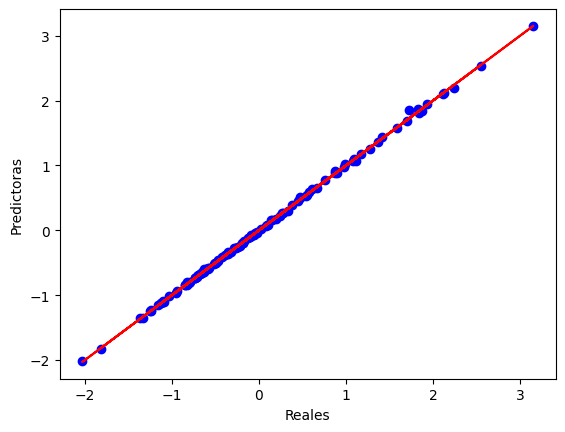

In [ ]:
plt.scatter(prueba['radius_mean'], y_pred, color='blue')
plt.plot(prueba['radius_mean'], prueba['radius_mean'], color='red')
plt.xlabel("Reales")
plt.ylabel("Predictoras")
plt.show()

Se hizo un gráfico que muestra cómo varían los errores en valores positivos y negativos en relación con el número de errores. Observamos que la variabilidad en el número de errores es baja.

Text(0, 0.5, 'Valor de error')

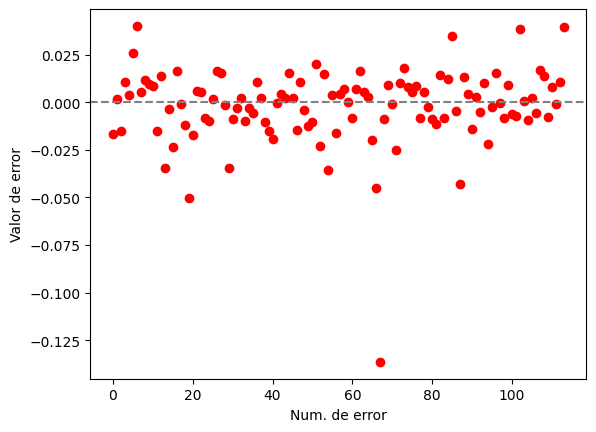

In [ ]:
plt.scatter(range(table.shape[0]), table['Error'], color='red')
plt.axhline(y=0, linestyle='--', color='gray')
plt.xlabel("Num. de error")
plt.ylabel("Valor de error")

Se ha creado un gráfico llamado histograma de errores, el cual nos muestra la probabilidad de que un error aparezca en un valor determinado. Al observar el gráfico, notamos que cuanto más cercano es el valor a 0 en el eje de errores, mayor es la probabilidad de error. Esto indica que la variabilidad del error es baja.

Text(0, 0.5, 'Probabilidad/Frecuencia')

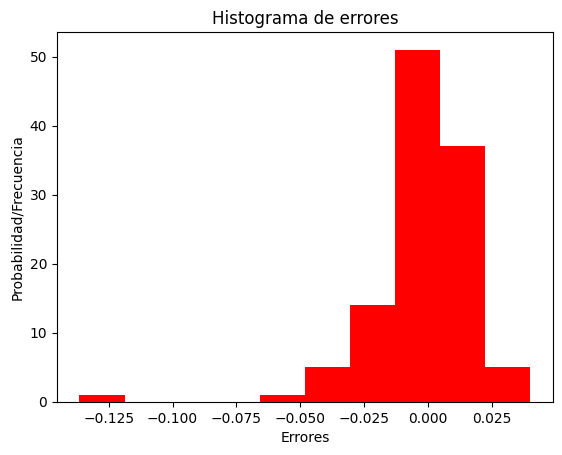

In [ ]:
plt.hist(x = table['Error'], color='red')
plt.title('Histograma de errores')
plt.xlabel("Errores")
plt.ylabel("Probabilidad/Frecuencia")

Se ha creado un gráfico lineal que compara los cuartiles de prueba y los cuartiles de predicción. Al observar el gráfico, notamos que la mayoría de los datos se ajustan a la línea de error, excepto uno. Además, podemos comparar la distribución normal (línea roja) con los datos del error en este tipo de gráfico y observar que la distribución es muy similar a lo esperado.

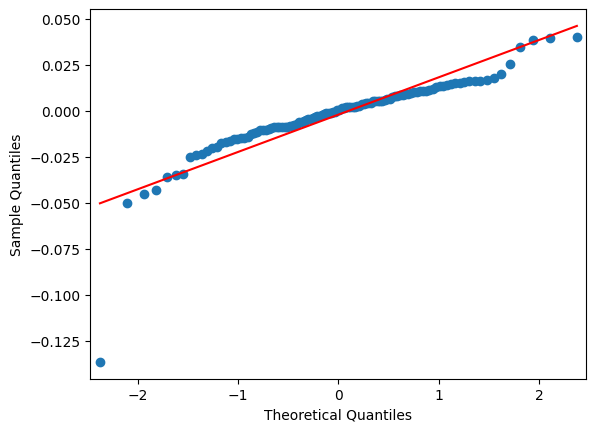

In [ ]:
QQ = sm.qqplot(table['Error'], stats.norm, line='s')

En primer lugar, se calculó la diferencia entre los valores reales y los valores predichos para obtener el error del modelo. Para ello, se creó una función con las variables predictoras cuyo valor fue menor a 0.05 en su P-valor, lo que permitió graficar dichos errores en relación al valor de 0. Además, se graficaron los datos mejor ajustados posibles en relación a las rectas x e y. Por último, pero no menos importante, se creó un histograma de errores y un QQ plot para observar el gran ajuste del modelo a pesar del error.